## MA3K7 Big Mini Project

Here is some code implementing the glasses game in problem 3, where you play as both Ali and Beth. Below are instructions on how to play.

When playing as Ali, fill a glass by clicking a desired glass and entering the desired volume. When no amount is entered, all of Ali's remaining water is filled into the selected glass. If multiple glasses are selected, the amount entered will be distributed equally between the selected glasses. Click a selected glass to deselect it.

When playing as Beth, select two adjacent glasses to empty them. Click a selected glass to deselect it. 

There is an undo button which can be used at any time.

In [1]:
import tkinter as tk
import math
from fractions import Fraction

class PubGame:
    def __init__(self, num_glasses):
        self.num_glasses = num_glasses
        self.glasses = [0.0] * num_glasses
        self.history = []
        self.selected_glasses = set()
        self.remaining_water = 0.5  
        self.turn = "Ali"  
        
        self.window = tk.Tk()
        self.window.title("Pub Game")
        self.canvas = tk.Canvas(self.window, width=400, height=400)
        self.canvas.pack()
        
        self.info_label = tk.Label(self.window, text="Ali's Turn: Select glasses to distribute water")
        self.info_label.pack()
        
        self.input_entry = tk.Entry(self.window)
        self.input_entry.pack()
        
        self.submit_button = tk.Button(self.window, text="Submit", command=self.handle_input)
        self.submit_button.pack()
        
        self.undo_button = tk.Button(self.window, text="Undo", command=self.undo)
        self.undo_button.pack()
        
        self.draw_glasses()
        self.window.mainloop()

    def draw_glasses(self):
        self.canvas.delete("all")
        center_x, center_y = 200, 200
        radius = 100
        angle_step = 2 * math.pi / self.num_glasses
        self.circle_positions = []

        for i in range(self.num_glasses):
            angle = -math.pi / 2 + i * angle_step  
            x = center_x + radius * math.cos(angle)
            y = center_y + radius * math.sin(angle)
            self.circle_positions.append((x, y))
            color = "blue" if i in self.selected_glasses else "white"
            self.canvas.create_oval(x-20, y-20, x+20, y+20, fill=color, outline="black", tags=f"glass_{i}")
            self.canvas.create_text(x, y, text=f"{self.glasses[i]:.4f}", tags=f"glass_{i}")
            self.canvas.create_text(x, y + 35, text=str(i + 1), font=("Arial", 10, "bold"))  # Move label lower down
            self.canvas.tag_bind(f"glass_{i}", "<Button-1>", lambda event, idx=i: self.toggle_selection(idx))

        self.info_label.config(text=f"{self.turn}'s Turn. Remaining Water: {self.remaining_water:.4f} pints" if self.turn == "Ali" else "Beth's Turn: Select two adjacent glasses to empty")

    def toggle_selection(self, index):
        if index in self.selected_glasses:
            self.selected_glasses.remove(index)
        else:
            if self.turn == "Ali":
                self.selected_glasses.add(index)
            elif self.turn == "Beth":
                if len(self.selected_glasses) == 0 or (len(self.selected_glasses) == 1 and abs(next(iter(self.selected_glasses)) - index) in [1, self.num_glasses - 1]):
                    self.selected_glasses.add(index)
                    if len(self.selected_glasses) == 2:
                        self.empty_selected()
                else:
                    self.info_label.config(text="Selected glass must be adjacent.")
        self.draw_glasses()

    def handle_input(self):
        if self.turn == "Ali":
            input_text = self.input_entry.get().strip()
            if not input_text:
                amount = self.remaining_water  
            else:
                try:
                    amount = float(Fraction(input_text))
                except ValueError:
                    self.info_label.config(text=f"Invalid input. Enter a valid decimal or fraction. Remaining Water: {self.remaining_water:.4f} pints")
                    return

            if amount > self.remaining_water:
                self.info_label.config(text=f"Not enough remaining water. Remaining Water: {self.remaining_water:.4f} pints")
                return

            if len(self.selected_glasses) == 0:
                self.info_label.config(text=f"Select at least one glass. Remaining Water: {self.remaining_water:.4f} pints")
                return

            self.history.append((self.glasses[:], self.turn, self.remaining_water))
            per_glass = amount / len(self.selected_glasses)
            for i in self.selected_glasses:
                self.glasses[i] += per_glass
                if self.glasses[i] > 1.0:
                    self.info_label.config(text="Ali wins! A glass has overflowed.")
                    return

            self.remaining_water -= amount
            self.selected_glasses.clear()
            self.input_entry.delete(0, tk.END)
            
            if self.remaining_water <= 0:
                self.turn = "Beth"
                self.selected_glasses.clear()
                self.info_label.config(text="Beth's Turn: Select two adjacent glasses to empty")
        
        self.draw_glasses()

    def empty_selected(self):
        if len(self.selected_glasses) != 2:
            self.info_label.config(text="Select exactly two adjacent glasses.")
            return
        
        indices = list(self.selected_glasses)
        if abs(indices[0] - indices[1]) not in [1, self.num_glasses - 1]:
            self.info_label.config(text="Selected glasses must be adjacent.")
            return
        
        self.history.append((self.glasses[:], self.turn, self.remaining_water))
        for i in indices:
            self.glasses[i] = 0
        
        self.selected_glasses.clear()
        self.turn = "Ali"
        self.remaining_water = 0.5
        self.info_label.config(text="Ali's Turn: Select glasses to distribute water")
        self.draw_glasses()
    
    def undo(self):
        if self.history:
            self.glasses, self.turn, self.remaining_water = self.history.pop()
            self.selected_glasses.clear()
            self.draw_glasses()
        else:
            self.info_label.config(text=f"No moves to undo. Remaining Water: {self.remaining_water:.4f} pints")

game = PubGame(4)


Below is the code I used to generate the graphs. 

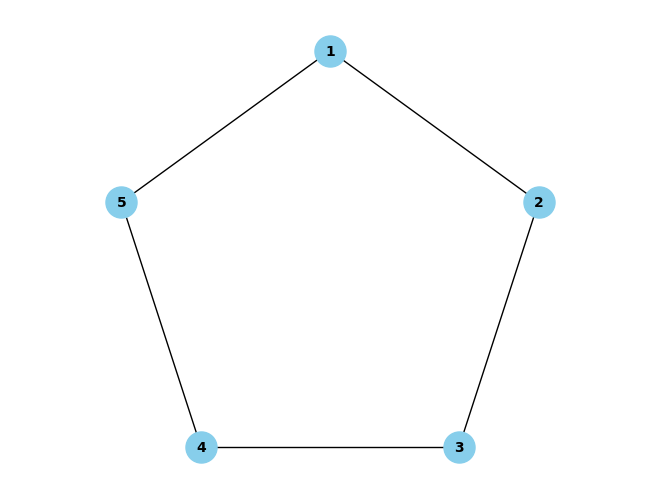

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def visualize_circular_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    
    for i in range(1, n):
        G.add_edge(i, i + 1)
    G.add_edge(n, 1)
    
    pos = {}
    angle_step = 2 * np.pi / n  

    for i in range(1, n + 1):
        angle = np.pi / 2 - (i - 1) * angle_step
        x = np.cos(angle)
        y = np.sin(angle)
        pos[i] = (x, y)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
    plt.axis('equal')  
    plt.show()

n = int(input("Enter the number of nodes: "))
visualize_circular_graph(n)

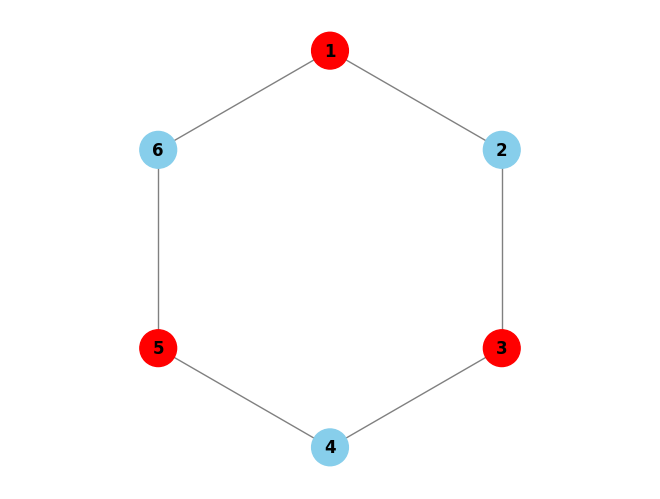

In [3]:
def visualize_graph_with_highlight(n):
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    
    for i in range(1, n):
        G.add_edge(i, i + 1)
    G.add_edge(n, 1)
    
    pos = {}
    angle_step = 2 * np.pi / n  
    
    for i in range(1, n + 1):
        angle = np.pi / 2 - (i - 1) * angle_step  
        pos[i] = (np.cos(angle), np.sin(angle))
    
    node_colors = []
    for node in G.nodes():
        if node % 2 == 1 and node != n:  
            node_colors.append('red')
        else:
            node_colors.append('skyblue')
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=700,
        node_color=node_colors,
        font_size=12,
        font_weight='bold',
        edge_color='gray'
    )
    
    plt.axis('equal')
    plt.show()

n = int(input("Enter the number of nodes: "))
visualize_graph_with_highlight(n)

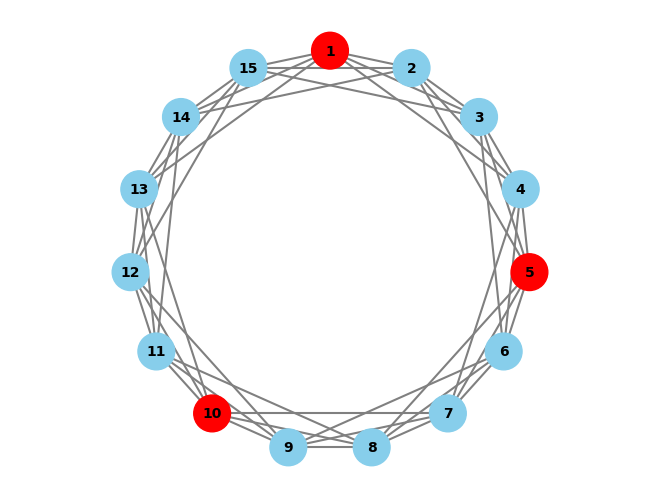

In [4]:
def generate_15_node_graph():
    n = 15
    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    
    for k in range(1, n + 1):
        for offset in [1, 2, 3]:
            neighbor = (k + offset - 1) % n + 1
            G.add_edge(k, neighbor)
    
    pos = {}
    angle_step = 2 * np.pi / n
    for i in range(1, n + 1):
        angle = np.pi / 2 - (i - 1) * angle_step  
        pos[i] = (np.cos(angle), np.sin(angle))
    
    highlight_nodes = {1, 5, 10}
    node_colors = ['red' if node in highlight_nodes else 'skyblue' for node in G.nodes()]
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=700,
        node_color=node_colors,
        font_size=10,
        font_weight='bold',
        edge_color='gray',
        width=1.5
    )
    
    plt.axis('equal')
    plt.show()

generate_15_node_graph()

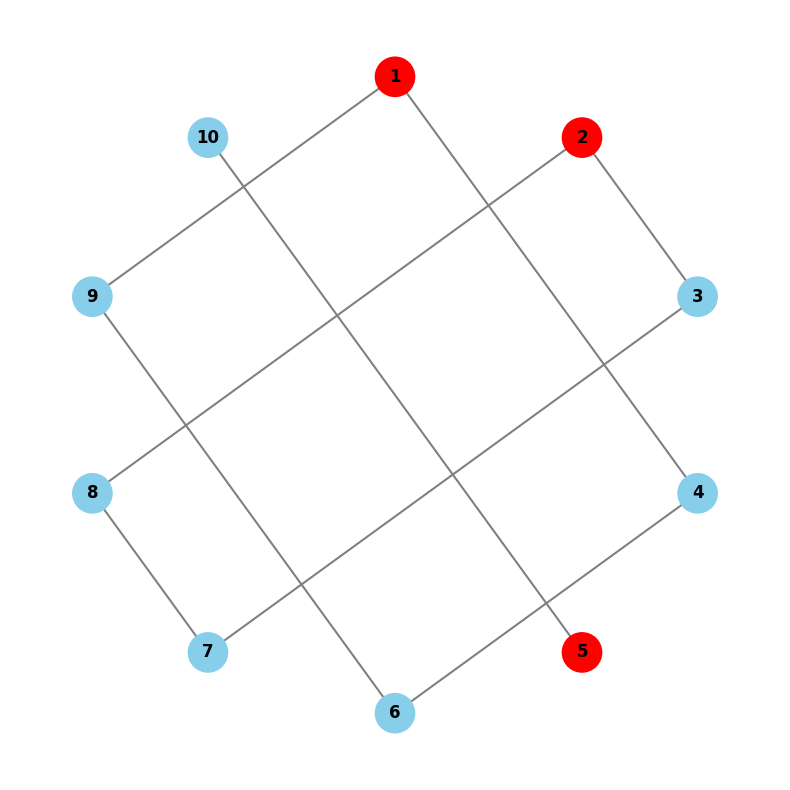

In [5]:
def create_mod5_graph_highlighted():
    G = nx.Graph()
    n = 10
    
    G.add_nodes_from(range(1, n + 1))
    
    for i in range(1, n + 1):
        for j in range(i + 1, n + 1):  
            if (i + j) % 5 == 0:
                G.add_edge(i, j)
    
    pos = {}
    angle_step = 2 * np.pi / n
    for i in range(1, n + 1):
        angle = np.pi/2 - (i-1)*angle_step  
        pos[i] = (np.cos(angle), np.sin(angle))
    
    node_colors = ['red' if node in {1, 2, 5} else 'skyblue' for node in G.nodes()]
    
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_colors)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.5)
    
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

create_mod5_graph_highlighted()